In [38]:
import pandas as pd

In [40]:
# Load datasets
dataset_path_CF = r"C:\Users\Randy\OneDrive\Documents\Desktop\Data Mining\DataSets\Finmark\Customer_Feedback_Data.csv"
dataset_path_PO = r"C:\Users\Randy\OneDrive\Documents\Desktop\Data Mining\DataSets\Finmark\Product_Offering_Data.csv"
dataset_path_TD = path_TD = r"C:\Users\Randy\OneDrive\Documents\Desktop\Data Mining\DataSets\Finmark\Transaction_Data.csv"

df_CF = pd.read_csv(dataset_path_CF)
df_PO = pd.read_csv(dataset_path_PO)
df_TD = pd.read_csv(dataset_path_TD)

In [42]:
# Display dataset information
print("Customer Feedback Data:")
print(df_CF.info())

print("\nProduct Offering Data:")
print(df_PO.info())

print("\nTransaction Data:")
print(df_TD.info())


Customer Feedback Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB
None

Product Offering Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-null      float64
 

In [48]:
# Create a DataFrame describing the features
feature_data = {
    "Feature Name": [
        "Customer_ID", "Satisfaction_Score", "Feedback_Comments", "Likelihood_to_Recommend",
        "Product_ID", "Product_Name", "Product_Type", "Risk_Level", "Target_Age_Group", "Target_Income_Group",
        "Transaction_ID", "Transaction_Date", "Transaction_Amount", "Transaction_Type"
    ],
    "Data Type": [
        "int64", "float64", "object", "int64",
        "int64", "object", "object", "object", "object", "object",
        "int64", "datetime", "float64", "object"
    ],
    "Description": [
        "Unique identifier for each customer",
        "Customer satisfaction score (1-10)",
        "Text-based customer feedback",
        "Likelihood of recommending FinMark (1-10)",
        "Unique identifier for each product",
        "Name of the financial product",
        "Type of product (e.g., Credit Card, Loan)",
        "Risk classification of the product (Low, Medium, High)",
        "Intended age group for the product",
        "Intended income group for the product",
        "Unique identifier for each transaction",
        "Date and time of transaction",
        "Amount of money involved in the transaction",
        "Type of transaction (Purchase, Bill Payment, Investment, etc.)"
    ]
}

# Convert to DataFrame
feature_table = pd.DataFrame(feature_data)

# Display Feature Table
feature_table


,Feature Name,Data Type,Description
0,Customer_ID,int64,Unique identifier for each customer
1,Satisfaction_Score,float64,Customer satisfaction score (1-10)
2,Feedback_Comments,object,Text-based customer feedback
3,Likelihood_to_Recommend,int64,Likelihood of recommending FinMark (1-10)
4,Product_ID,int64,Unique identifier for each product
5,Product_Name,object,Name of the financial product
6,Product_Type,object,"Type of product (e.g., Credit Card, Loan)"
7,Risk_Level,object,"Risk classification of the product (Low, Mediu..."
8,Target_Age_Group,object,Intended age group for the product
9,Target_Income_Group,object,Intended income group for the product


C:\Users\Randy\AppData\Local\Temp\ipykernel_40520\2505343958.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
 'nan' 'nan' 'nan']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_PO.loc[:, 'Target_Age_Group'] = df_PO['Target_Age_Group'].astype(str).fillna("Unknown")


In [50]:

# Remove Satisfaction Scores greater than 10
df_CF_cleaned = df_CF[df_CF["Satisfaction_Score"] <= 10]

# Remove Transaction Amount outliers using IQR
q1_transaction, q3_transaction = df_TD["Transaction_Amount"].quantile([0.25, 0.75])
iqr_transaction = q3_transaction - q1_transaction
upper_bound_transaction = q3_transaction + 1.5 * iqr_transaction
df_TD_filtered = df_TD[df_TD["Transaction_Amount"] <= upper_bound_transaction]

# Display cleaned Customer Feedback Summary
print("Customer Feedback Summary (Only Scores 1-10):\n", df_CF_cleaned[['Satisfaction_Score', 'Likelihood_to_Recommend']].describe())

# Display cleaned Transaction Data Summary
print("\nTransaction Data Summary (After Removing Outliers):\n", df_TD_filtered[['Transaction_Amount']].describe())

# Display Product Offering Summary (Including Categorical Features)
print("\nProduct Offering Category Distribution:\n", df_PO.describe(include="all"))


Customer Feedback Summary (Only Scores 1-10):
        Satisfaction_Score  Likelihood_to_Recommend
count         5040.000000              5040.000000
mean             5.592659                 5.568452
std              2.803151                 2.872096
min              1.000000                 1.000000
25%              3.000000                 3.000000
50%              6.000000                 6.000000
75%              8.000000                 8.000000
max             10.000000                10.000000

Transaction Data Summary (After Removing Outliers):
        Transaction_Amount
count         5040.000000
mean          2497.751716
std           1425.779842
min             10.000000
25%           1254.000000
50%           2537.000000
75%           3673.000000
max           4999.000000

Product Offering Category Distribution:
         Product_ID          Product_Name Product_Type Risk_Level  \
count    15.000000                    15           15         15   
unique         NaN          

In [52]:
# Create a Satisfaction Category feature
def satisfaction_category(score):
    if score <= 4:
        return 'Low'
    elif 5 <= score <= 7:
        return 'Medium'
    else:
        return 'High'

df_CF['Satisfaction_Category'] = df_CF['Satisfaction_Score'].apply(satisfaction_category)

# Calculate Total Transactions per Customer
customer_transactions = df_TD.groupby("Customer_ID")["Transaction_Amount"].sum().reset_index()
customer_transactions.rename(columns={"Transaction_Amount": "Total_Spent"}, inplace=True)

# Merge with Customer Feedback dataset
df_CF = df_CF.merge(customer_transactions, on="Customer_ID", how="left")

# Display updated dataset
print(df_CF.head())


   Customer_ID  Satisfaction_Score  Feedback_Comments  \
0            1                10.0     Very satisfied   
1            2                 3.0     Very satisfied   
2            3                10.0     Very satisfied   
3            4                 7.0  Needs improvement   
4            5                 8.0     Unsatisfactory   

   Likelihood_to_Recommend Satisfaction_Category  Total_Spent  
0                        9                  High      16836.0  
1                        3                   Low       4907.0  
2                        1                  High       1538.0  
3                        4                Medium       8295.0  
4                        7                  High      14798.0  


In [54]:
# Save cleaned and processed data
df_CF.to_csv("Processed_Customer_Feedback.csv", index=False)
df_PO.to_csv("Processed_Product_Offering.csv", index=False)
df_TD.to_csv("Processed_Transaction_Data.csv", index=False)

print("Processed datasets saved successfully!")


Processed datasets saved successfully!


In [57]:
# Summary statistics for Customer Feedback dataset
print("Customer Feedback Summary:\n", df_CF[['Satisfaction_Score', 'Likelihood_to_Recommend']].describe())

# Summary statistics for Transaction dataset
print("\nTransaction Data Summary:\n", df_TD[['Transaction_Amount']].describe())

# Summary statistics for Product Offering dataset (if applicable)
if 'Target_Age_Group' in df_PO.columns and 'Target_Income_Group' in df_PO.columns:
    print("\nProduct Offering Summary:\n", df_PO.describe())


Customer Feedback Summary:
        Satisfaction_Score  Likelihood_to_Recommend
count         5050.000000              5050.000000
mean             5.691089                 5.571287
std              3.570530                 2.872577
min              1.000000                 1.000000
25%              3.000000                 3.000000
50%              6.000000                 6.000000
75%              8.000000                 8.000000
max             60.000000                10.000000

Transaction Data Summary:
        Transaction_Amount
count         5050.000000
mean          3094.726465
std          14671.020221
min             10.000000
25%           1257.000000
50%           2540.000000
75%           3680.750000
max         480300.000000

Product Offering Summary:
        Product_ID
count   15.000000
mean     5.133333
std      3.159265
min      1.000000
25%      2.500000
50%      5.000000
75%      7.500000
max     10.000000


In [59]:
# Remove Satisfaction Scores greater than 10
df_CF = df_CF[df_CF["Satisfaction_Score"] <= 10]

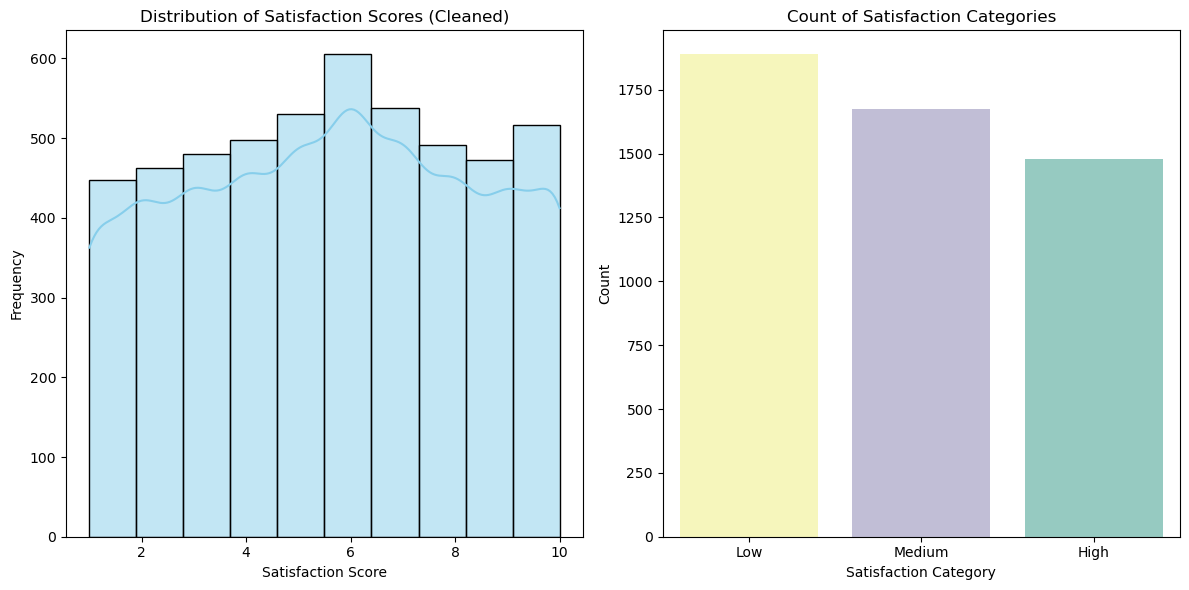

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# --- Visualizations ---

# 1. Satisfaction Score Distribution (with categories)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_CF['Satisfaction_Score'], kde=True, color='skyblue', bins=10)
plt.title('Distribution of Satisfaction Scores (Cleaned)')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.countplot(x='Satisfaction_Category', data=df_CF, order=['Low', 'Medium', 'High'], 
              hue='Satisfaction_Category', palette='Set3', legend=False)
plt.title('Count of Satisfaction Categories')
plt.xlabel('Satisfaction Category')
plt.ylabel('Count'
plt.tight_layout() 
plt.show()



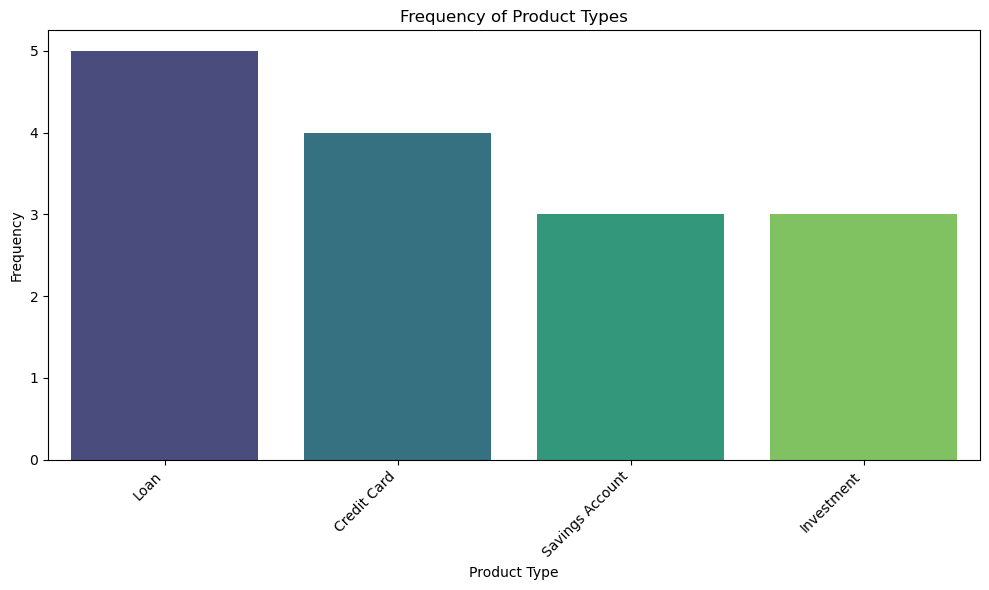

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
#3. Frequency of Product Types
# Count occurrences of each product type
product_counts = df_PO["Product_Type"].value_counts()

# Plot the bar chart with hue assigned explicitly
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, hue=product_counts.index, palette='viridis', dodge=False)
plt.title('Frequency of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)  # Remove legend since hue is only for color fix
plt.tight_layout()
plt.show()


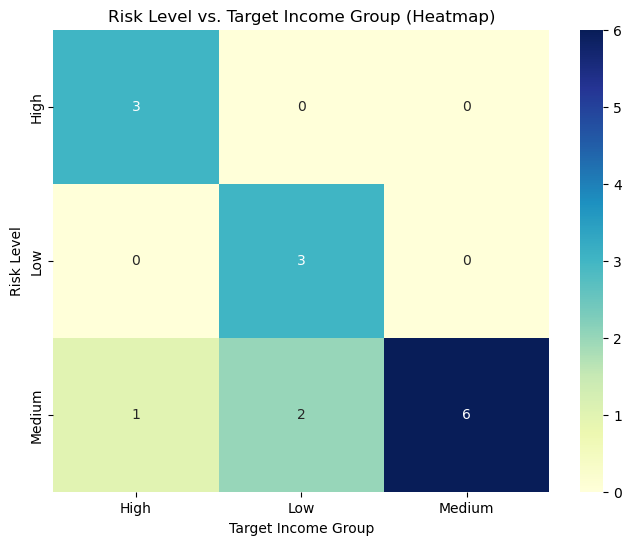

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a contingency table (counts of each combination)
contingency_table = pd.crosstab(df_PO["Risk_Level"], df_PO["Target_Income_Group"])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")  # annot=True shows the counts
plt.title("Risk Level vs. Target Income Group (Heatmap)")
plt.xlabel("Target Income Group")
plt.ylabel("Risk Level")
plt.show()